<a href="https://colab.research.google.com/github/jennyschilling/project_voting_group11/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This file attempts to create and find the best predictive model for our data, as well as create several descriptive and helpful visualizations.

In [ ]:
! rm -r project_voting_group11/

In [1]:
!git clone https://github.com/jennyschilling/project_voting_group11

Cloning into 'project_voting_group11'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 123 (delta 20), reused 23 (delta 11), pack-reused 84
Receiving objects: 100% (123/123), 35.28 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (55/55), done.


In [7]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.tree import DecisionTreeRegressor # decision tree regression model
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from keras.models import Sequential # ANN
from keras.layers import Dense # ANN
from sklearn.ensemble import RandomForestClassifier # RandomForest

In [3]:
# get the data
Df = pd.read_csv('/content/project_voting_group11/data/cleaned_VA_voting.csv')
Df.head()

,county_name,candidatevotes,totalvotes,Total,Born in US,Born in US Territory,Born Abroad,Naturalized,Not US Citizen,Total Pop,...,Total Midage Men,Total Female Pop,Total Young-adult Women,Total Midage Women,Total Pop Below Poverty,Total Pop At/Above Poverty,Total Disabled Pop,Total Children,Total Seniors,netvotes
0,ACCOMACK,5495,16962,32560,29524,119,192,782,1943,32227,...,5882,16517,2858,6474,19119,77562,4253,6764,7527,8.067149
1,ALBEMARLE,33416,64657,108819,95653,469,1470,5183,6044,101147,...,18680,56466,13740,20763,23259,280182,9638,21823,19784,-10.676462
2,ALLEGHANY,1250,8203,15030,14733,0,111,91,95,14744,...,2819,7525,1266,3052,6945,37287,2829,2837,3439,8.886271
3,AMELIA,1719,7894,12970,12694,0,97,73,106,12873,...,2670,6356,1165,2667,4146,34473,1924,2757,2445,8.692490
4,AMHERST,3871,17005,31782,30977,71,151,361,222,31002,...,6091,16423,3106,6596,10179,82827,4888,6213,6516,9.281544


###Trying Linear Regression

R^2 train =  0.6647417656261243
R^2 test =  0.5802873084352382


Text(0, 0.5, 'Predicted data')

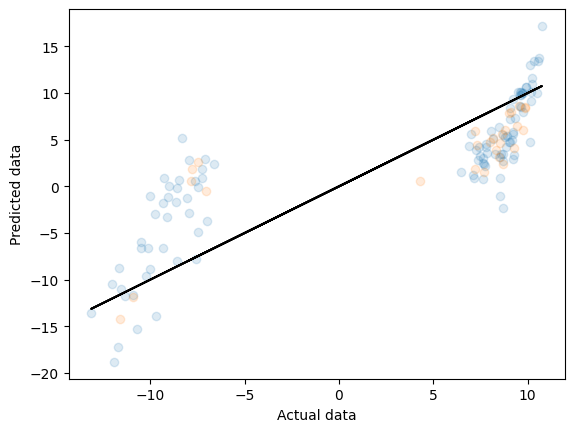

In [ ]:
# predictive model at county level
X = Df.drop(columns=['county_name','netvotes'])
y = Df['netvotes']

# scaling and train/test split
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.2, shuffle=True, random_state=42)

# linear regression
stock_reg = LinearRegression().fit(X_train, y_train)
ypred_train = stock_reg.predict(X_train)
r2_train = abs(stock_reg.score(X_train, y_train))
print("R^2 train = ", r2_train)
ypred_test = stock_reg.predict(X_test)
r2_test = abs(stock_reg.score(X_test, y_test))
print("R^2 test = ", r2_test)

# parity plot
fig, ax = plt.subplots()
ax.scatter(y_train, ypred_train,alpha=0.15)
ax.scatter(y_test, ypred_test,alpha=0.15)
ax.plot(y,y, '-k');
ax.set_xlabel('Actual data')
ax.set_ylabel('Predicted data')

In [ ]:
# finding state winner
win_actual = np.sinh(Df['netvotes']).sum()
print(win_actual) # negative value shows democrats won VA by 451138 votes
totalpopt = Df['Total'].sum()
margin_actual = 100*win_actual/totalpopt
print(margin_actual) # reveals that D won by margin of 5%

win_pred = np.sinh(ypred_test).sum()
print(win_pred) # predicted correct democrat win but votes still off
totalpopt_test = np.sum(scaler.inverse_transform(X_test)[:, 2])
margin_test = 100*win_pred/totalpopt_test
print(margin_test) # reveals that D won by margin of 81% - extremely unlikely

-451137.9999999999
-5.301669056584526
-779266.8056780212
-81.3927076294966


###Trying Logistic Regression

In [4]:
# 1 for Republican win, 0 for Democratic win
Df['target'] = (Df['netvotes'] > 0).astype(int)

#feature scaling
features = Df.drop(['county_name', 'totalvotes', 'netvotes', 'target'], axis=1)
target = Df['target']

# standardizing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106, 19), (27, 19), (106,), (27,))

In [ ]:
#training logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.8518518518518519
[[ 2  4]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.84      1.00      0.91        21

    accuracy                           0.85        27
   macro avg       0.92      0.67      0.71        27
weighted avg       0.88      0.85      0.82        27



85% accuracy, which isn't great, performs well in predicting Republican wins, but so the model is biased toward predicting Republican wins.
^might be due to an imbalance in the training data or certain features disproportionately influencing the predictions toward Republican outcomes

####Trying Decision Tree

In [9]:
# training decision tree model with same train/test split as logistic regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.2222222222222222
0.7777777777777778
[[ 4  2]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.89      0.81      0.85        21

    accuracy                           0.78        27
   macro avg       0.70      0.74      0.71        27
weighted avg       0.81      0.78      0.79        27



####Trying RandomForest

In [8]:
# create and fit
# using same X and y from before
model = RandomForestClassifier()
model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(conf_matrix)
print(report)

0.18518518518518517
0.8148148148148148
[[ 3  3]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.86      0.90      0.88        21

    accuracy                           0.81        27
   macro avg       0.73      0.70      0.71        27
weighted avg       0.81      0.81      0.81        27



##### Trying Artificial Neural Network

In [ ]:
# trying ANN with keras and the same transformed data

# keep track of different models performances
r2_density_dict = {}

# try different values for hyper-parameters ina. 2 hidden layer network
for density in range(4, 20, 2):
  for epoch in range(4, 20, 2):
    for batch_sizes in range(4, 20, 2):

      model = Sequential()

      model.add(Dense(units=density, activation="relu", input_shape=(X_train.shape[1],)))
      model.add(Dense(units=density, activation="relu", input_shape=(X_train.shape[1],)))
      model.add(Dense(1, activation="linear"))

      model.compile(optimizer="adam", loss="mean_squared_error")

      model.fit(X_train,
                y_train,
                epochs=epoch,
                # verbose=1,
                batch_size=batch_sizes,
                validation_data=(X_test, y_test))

      y_pred = model.predict(X_test)
      r2 = r2_score(y_test, y_pred)
      r2_density_dict[(density, epoch, batch_sizes)] = r2

print(r2_density_dict)
print(" best r^2 = ", max(r2_density_dict.values()))
# best is with a density of 16, 18 epochs, and a batch size of 6 to reach an r-squared of 0.508728858348153

Epoch 1/4
27/27 [==============================] - 1s 11ms/step - loss: 2.0924 - val_loss: 1.2390
Epoch 2/4
27/27 [==============================] - 0s 3ms/step - loss: 1.6757 - val_loss: 1.0775
Epoch 3/4
27/27 [==============================] - 0s 4ms/step - loss: 1.3316 - val_loss: 0.9664
Epoch 4/4
1/1 [==============================] - 0s 107ms/step
Epoch 1/4
18/18 [==============================] - 1s 16ms/step - loss: 0.7516 - val_loss: 0.7506
Epoch 2/4
18/18 [==============================] - 0s 8ms/step - loss: 0.5387 - val_loss: 0.5246
Epoch 3/4
18/18 [==============================] - 0s 8ms/step - loss: 0.4192 - val_loss: 0.4064
Epoch 4/4
1/1 [==============================] - 0s 91ms/step
Epoch 1/4
14/14 [==============================] - 1s 22ms/step - loss: 1.5748 - val_loss: 0.8270
Epoch 2/4
14/14 [==============================] - 0s 7ms/step - loss: 1.3526 - val_loss: 0.7863
Epoch 3/4
14/14 [==============================] - 0s 8ms/step - loss: 1.1863 - val_loss: 0.7507

1/1 [==============================] - 0s 140ms/step
Epoch 1/4
8/8 [==============================] - 1s 40ms/step - loss: 0.6591 - val_loss: 0.8160
Epoch 2/4
8/8 [==============================] - 0s 12ms/step - loss: 0.6272 - val_loss: 0.7747
Epoch 3/4
8/8 [==============================] - 0s 14ms/step - loss: 0.5967 - val_loss: 0.7419
Epoch 4/4
8/8 [==============================] - 0s 10ms/step - loss: 0.5712 - val_loss: 0.7143


Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 14ms/step - loss: 0.9673 - val_loss: 0.3697
Epoch 5/14
6/6 [==============================] - 0s 13ms/step - loss: 0.8191 - val_loss: 0.3078
Epoch 6/14
6/6 [==============================] - 0s 15ms/step - loss: 0.6887 - val_loss: 0.2593
Epoch 7/14
6/6 [==============================] - 0s 16ms/step - loss: 0.5364 - val_loss: 0.2231
Epoch 8/14
6/6 [==============================] - 0s 17ms/step - loss: 0.4531 - val_loss: 0.1971
Epoch 9/14
6/6 [==============================] - 0s 17ms/step - loss: 0.3856 - val_loss: 0.1817
Epoch 10/14
6/6 [==============================] - 0s 16ms/step - loss: 0.3158 - val_loss: 0.1731
Epoch 11/14
6/6 [==============================] - 0s 19ms/step - loss: 0.2984 - val_loss: 0.1688
Epoch 12/14
6/6 [==============================] - 0s 13ms/step - loss: 0.2705 - val_loss: 0.1663
Epoch 13/14
6/6 [==============================] - 0s 15ms/step - loss: 0.2546 - val

In [ ]:
# repeating from ANN above but with only 1 hidden layer

# keep track of different models performances
r2_density_dict = {}

# try different values for hyper-parameters ina. 2 hidden layer network
for density in range(4, 20, 2):
  for epoch in range(4, 20, 2):
    for batch_sizes in range(4, 20, 2):

      model = Sequential()

      model.add(Dense(units=density, activation="relu", input_shape=(X_train.shape[1],)))
      model.add(Dense(1, activation="linear"))

      model.compile(optimizer="adam", loss="mean_squared_error")

      model.fit(X_train,
                y_train,
                epochs=epoch,
                # verbose=1,
                batch_size=batch_sizes,
                validation_data=(X_test, y_test))

      y_pred = model.predict(X_test)
      r2 = r2_score(y_test, y_pred)
      r2_density_dict[(density, epoch, batch_sizes)] = r2

print(r2_density_dict)
print(" best r^2 = ", max(r2_density_dict.values()))
# best is with a density of 16, 14 epochs, and a batch size of 4 to reach an r-sequared of 0.427874658389777

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 18ms/step - loss: 1.1285 - val_loss: 0.6574
Epoch 5/14
6/6 [==============================] - 0s 18ms/step - loss: 0.8729 - val_loss: 0.5539
Epoch 6/14
6/6 [==============================] - 0s 17ms/step - loss: 0.7252 - val_loss: 0.4697
Epoch 7/14
6/6 [==============================] - 0s 15ms/step - loss: 0.5504 - val_loss: 0.4029
Epoch 8/14
6/6 [==============================] - 0s 14ms/step - loss: 0.4427 - val_loss: 0.3515
Epoch 9/14
6/6 [==============================] - 0s 16ms/step - loss: 0.3700 - val_loss: 0.3115
Epoch 10/14
6/6 [==============================] - 0s 13ms/step - loss: 0.3269 - val_loss: 0.2813
Epoch 11/14
6/6 [==============================] - 0s 15ms/step - loss: 0.2981 - val_loss: 0.2580
Epoch 12/14
6/6 [==============================] - 0s 19ms/step - loss: 0.2725 - val_loss: 0.2405
Epoch 13/14
6/6 [==============================] - 0s 17ms/step - loss: 0.2578 - val